# EDA
Perform time series Exploratory Data Analysis (EDA) 
Data: pred_maint_timeseries_with_failures.csv


In [63]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

!pip install plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots


import numpy as np
from scipy.stats import shapiro, normaltest, probplot

Defaulting to user installation because normal site-packages is not writeable


In [68]:
%run "variables.py"

In [73]:
%run "functions.ipynb"

# Data loading

Load the two CSV files, pred_maint_timeseries_with_failures.csv into pandas DataFrame.


In [28]:
# df = pd.read_csv(f'{DATA_DIR}/pred_maint_timeseries_with_failures.csv')
df = pd.read_csv(f'{DATA_DIR}/pred_maint_year_outliers_nulls.csv')
display(df.head())

,machineid,datetimestamp,enginegastemperature1,enginegastemperature2,enginegastemperature3,enginegastemperature4,enginegastemperature5,enginegastemperature6,pressure
0,1,2025-01-01 00:00:00,302.483571,385.408617,303.238443,307.615149,298.829233,298.829315,103.158426
1,1,2025-01-01 00:10:00,303.837174,300.111109,297.861035,297.340913,299.412622,301.110395,98.464047
2,1,2025-01-01 00:20:00,299.877724,301.777757,302.085056,304.162309,298.533004,299.850807,100.190252
3,1,2025-01-01 00:30:00,303.323272,303.895963,294.494511,305.651141,301.865595,298.067635,97.682460
4,1,2025-01-01 00:40:00,297.766293,NaN,301.614999,NaN,289.108329,294.780518,100.345387


# Data Exploration

## Descriptive statistics

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262800 entries, 0 to 262799
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   machineid              262800 non-null  int64  
 1   datetimestamp          262800 non-null  object 
 2   enginegastemperature1  247227 non-null  float64
 3   enginegastemperature2  247090 non-null  float64
 4   enginegastemperature3  247028 non-null  float64
 5   enginegastemperature4  247054 non-null  float64
 6   enginegastemperature5  247144 non-null  float64
 7   enginegastemperature6  247013 non-null  float64
 8   pressure               247183 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 18.0+ MB


In [30]:
exploreDataFrame(df=df, df_name= "Pred Maint")


Exploring DataFrame: Pred Maint

Shape: (262800, 9) 

Data Types:
 machineid                  int64
datetimestamp             object
enginegastemperature1    float64
enginegastemperature2    float64
enginegastemperature3    float64
enginegastemperature4    float64
enginegastemperature5    float64
enginegastemperature6    float64
pressure                 float64
dtype: object 

Missing Values:
 machineid                    0
datetimestamp                0
enginegastemperature1    15573
enginegastemperature2    15710
enginegastemperature3    15772
enginegastemperature4    15746
enginegastemperature5    15656
enginegastemperature6    15787
pressure                 15617
dtype: int64 



In [31]:
summarizeDataFrame(df)

,Column Name,Data type,Count,Missing Values (#),Missing Values (%),Mean,STD,Min,25%,50%,75%,Max
0,machineid,int64,262800,0,0.00,3.000000,1.414216,1.000000,2.000000,3.000000,4.000000,5.000000
1,datetimestamp,object,262800,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,enginegastemperature1,float64,247227,15573,5.93,301.005185,10.162036,274.324401,296.668605,300.080749,303.515262,411.196321
3,enginegastemperature2,float64,247090,15710,5.98,301.018421,10.165767,278.760206,296.684787,300.101600,303.533725,411.948091
4,enginegastemperature3,float64,247028,15772,6.00,301.001678,10.078226,277.104182,296.680902,300.103268,303.522036,411.385510
5,enginegastemperature4,float64,247054,15746,5.99,300.979173,9.992302,274.785904,296.678926,300.075432,303.534017,412.125814
6,enginegastemperature5,float64,247144,15656,5.96,301.009782,10.133638,277.900384,296.682406,300.085919,303.526350,414.453470
7,enginegastemperature6,float64,247013,15787,6.01,300.987688,9.999966,277.166279,296.675826,300.099480,303.546116,410.752224
8,pressure,float64,247183,15617,5.94,99.996430,2.000203,90.433522,98.646041,99.992047,101.345026,109.312485


In [34]:
display(df.describe())

,machineid,enginegastemperature1,enginegastemperature2,enginegastemperature3,enginegastemperature4,enginegastemperature5,enginegastemperature6,pressure
count,262800.000000,247227.000000,247090.000000,247028.000000,247054.000000,247144.000000,247013.000000,247183.000000
mean,3.000000,301.005185,301.018421,301.001678,300.979173,301.009782,300.987688,99.996430
std,1.414216,10.162036,10.165767,10.078226,9.992302,10.133638,9.999966,2.000203
min,1.000000,274.324401,278.760206,277.104182,274.785904,277.900384,277.166279,90.433522
25%,2.000000,296.668605,296.684787,296.680902,296.678926,296.682406,296.675826,98.646041
50%,3.000000,300.080749,300.101600,300.103268,300.075432,300.085919,300.099480,99.992047
75%,4.000000,303.515262,303.533725,303.522036,303.534017,303.526350,303.546116,101.345026
max,5.000000,411.196321,411.948091,411.385510,412.125814,414.453470,410.752224,109.312485


In [35]:
# enginegastemperature1
# In a normal distribution, the mean ≈ median.
mean = df['enginegastemperature1'].mean()
median = df['enginegastemperature1'].median()
print(f"Mean: {mean}, Median: {median}")

Mean: 301.0051849840636, Median: 300.0807488639182


In [36]:
print("Skewness:", df['enginegastemperature1'].skew())
print("Kurtosis:", df['enginegastemperature1'].kurt())

Skewness: 5.840548650377032
Kurtosis: 45.25392357053644


### Null values

In [37]:
display(df.isnull().sum())

machineid                    0
datetimestamp                0
enginegastemperature1    15573
enginegastemperature2    15710
enginegastemperature3    15772
enginegastemperature4    15746
enginegastemperature5    15656
enginegastemperature6    15787
pressure                 15617
dtype: int64

In [38]:
# Verify if there no any number
display(df.isna().sum())

machineid                    0
datetimestamp                0
enginegastemperature1    15573
enginegastemperature2    15710
enginegastemperature3    15772
enginegastemperature4    15746
enginegastemperature5    15656
enginegastemperature6    15787
pressure                 15617
dtype: int64

### Duplicated values

In [39]:
df.duplicated().any

<bound method Series.any of 0         False
1         False
2         False
3         False
4         False
          ...  
262795    False
262796    False
262797    False
262798    False
262799    False
Length: 262800, dtype: bool>

### Index

In [13]:
df.index

RangeIndex(start=0, stop=262800, step=1)

In [14]:
df = df.set_index('datetimestamp')

In [15]:
df.index

Index(['2025-01-01 00:00:00', '2025-01-01 00:10:00', '2025-01-01 00:20:00',
       '2025-01-01 00:30:00', '2025-01-01 00:40:00', '2025-01-01 00:50:00',
       '2025-01-01 01:00:00', '2025-01-01 01:10:00', '2025-01-01 01:20:00',
       '2025-01-01 01:30:00',
       ...
       '2025-12-31 22:20:00', '2025-12-31 22:30:00', '2025-12-31 22:40:00',
       '2025-12-31 22:50:00', '2025-12-31 23:00:00', '2025-12-31 23:10:00',
       '2025-12-31 23:20:00', '2025-12-31 23:30:00', '2025-12-31 23:40:00',
       '2025-12-31 23:50:00'],
      dtype='object', name='datetimestamp', length=262800)

## Analyze features

In [16]:
analyzeDFFeatures(df=df, df_name= "Pred Maint")

DataFrame: Pred Maint


Numerical Features:

           machineid  enginegastemperature1  enginegastemperature2  \
count  262800.000000          262800.000000          262800.000000   
mean        3.000000             301.013095             301.016729   
std         1.414216              10.181835              10.160601   
min         1.000000             274.324401             278.760206   
25%         2.000000             296.674232             296.682120   
50%         3.000000             300.084453             300.100254   
75%         4.000000             303.516394             303.533216   
max         5.000000             411.196321             411.948091   

       enginegastemperature3  enginegastemperature4  enginegastemperature5  \
count          262800.000000          262800.000000          262800.000000   
mean              300.996511             300.980933             301.002924   
std                10.060855              10.009863              10.107151   
min         

## Outliers

In [44]:
# Function to find outliers in a single DataFrame
findOutliersDF(df=df, df_name= "Pred Maint")


Potential outliers in machineid:
 0

Potential outliers in enginegastemperature1:
 4933

Potential outliers in enginegastemperature2:
 4844

Potential outliers in enginegastemperature3:
 4807

Potential outliers in enginegastemperature4:
 4689

Potential outliers in enginegastemperature5:
 4822

Potential outliers in enginegastemperature6:
 4710

Potential outliers in pressure:
 1720


## Time Series Plot

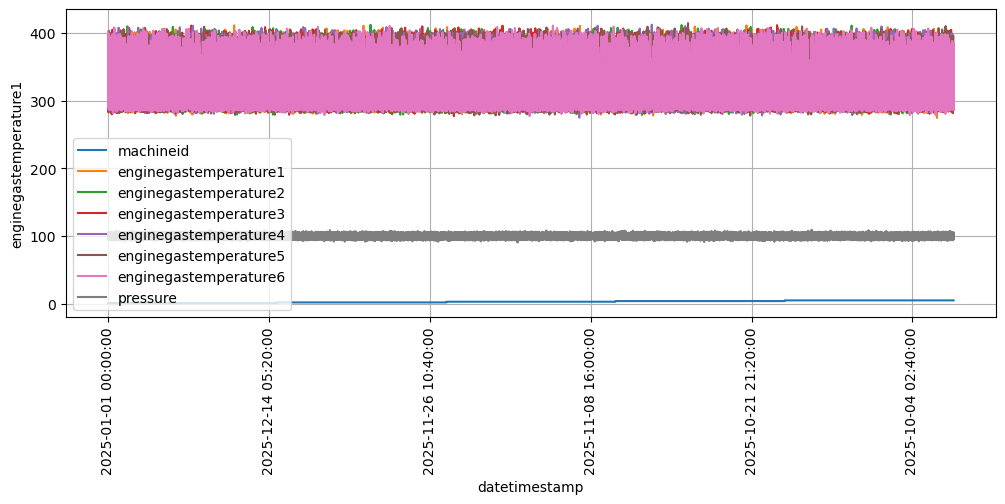

In [18]:
ax =df.plot(figsize=(12,4))
ax.grid()
plt.xticks(rotation=90) 
ax.set_ylabel('enginegastemperature1');

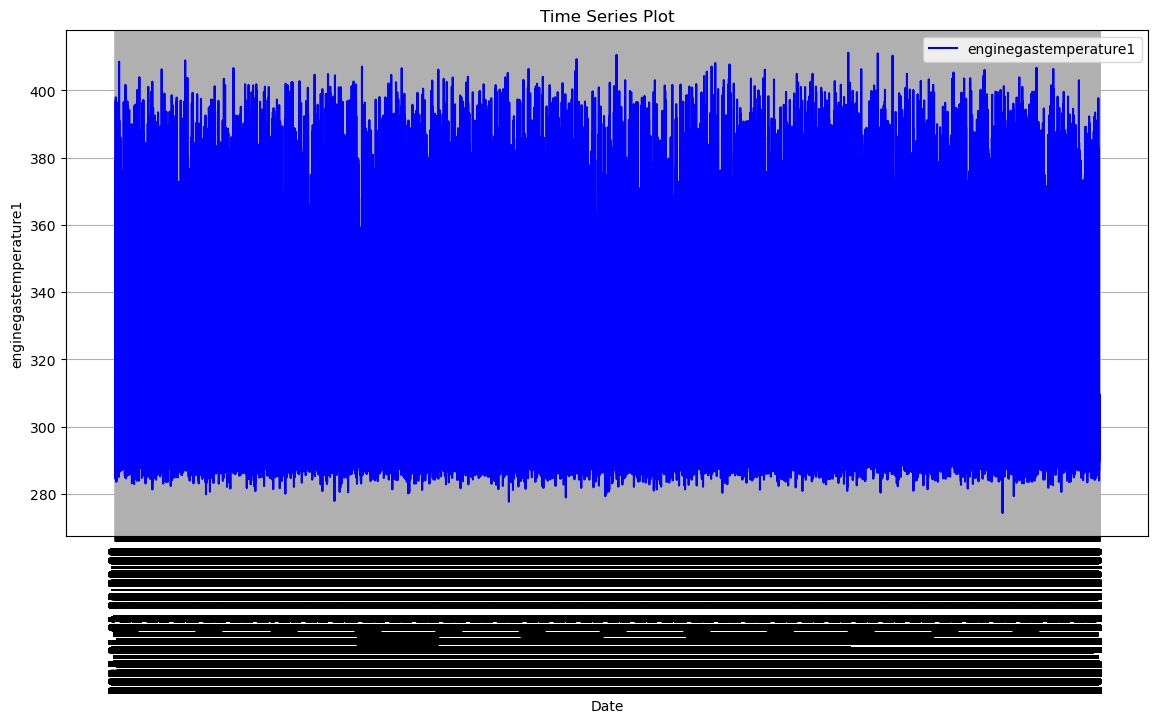

In [19]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['enginegastemperature1'], label='enginegastemperature1', color='blue')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('enginegastemperature1')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=90) 
plt.show()

## Distribution

In [45]:
columns_plot=['enginegastemperature1', 'enginegastemperature2','enginegastemperature3', 'enginegastemperature4', 'enginegastemperature5', 'enginegastemperature6']
columns=['enginegastemperature1', 'enginegastemperature2','enginegastemperature3', 'enginegastemperature4', 'enginegastemperature5', 'enginegastemperature6','pressure']    

### Histogram

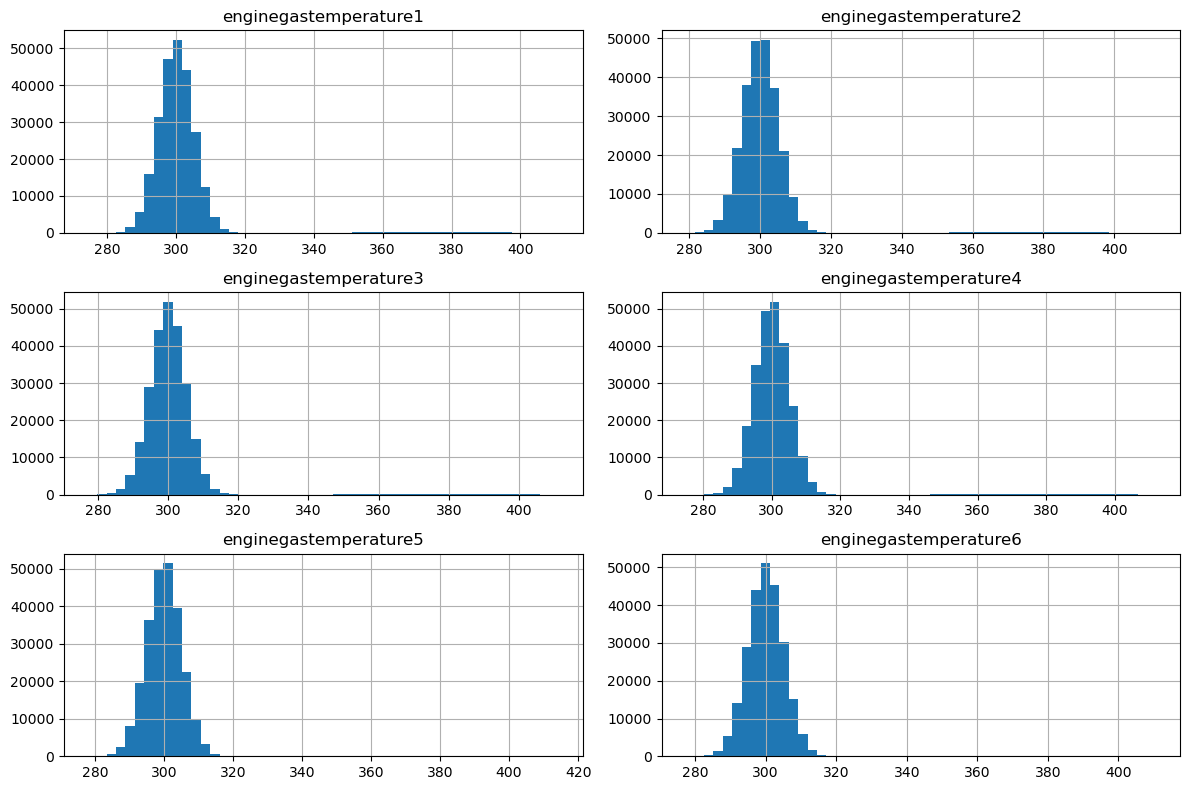

In [46]:
df[columns_plot].hist(figsize=(12, 8), bins=50)
plt.tight_layout()
plt.show()

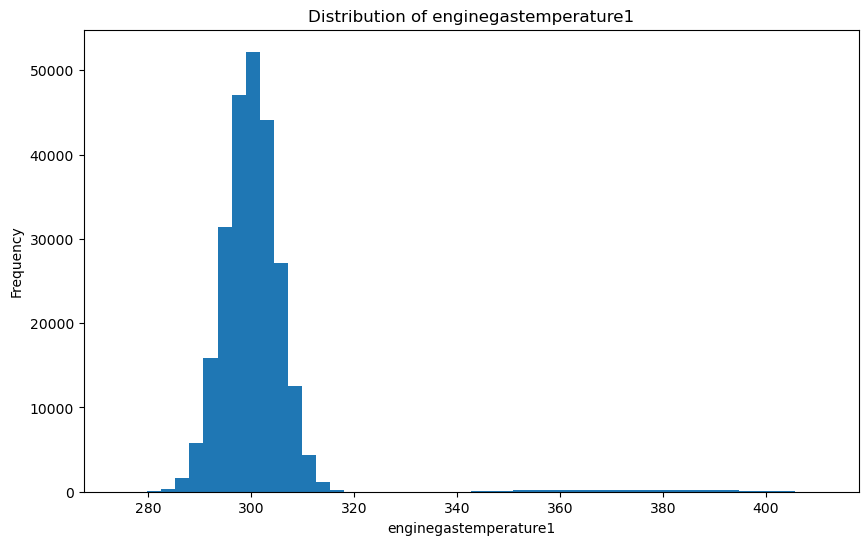

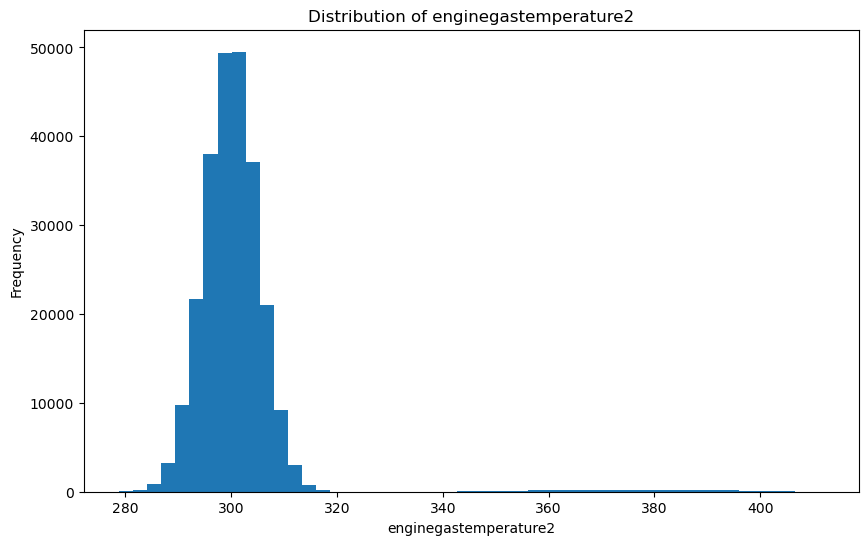

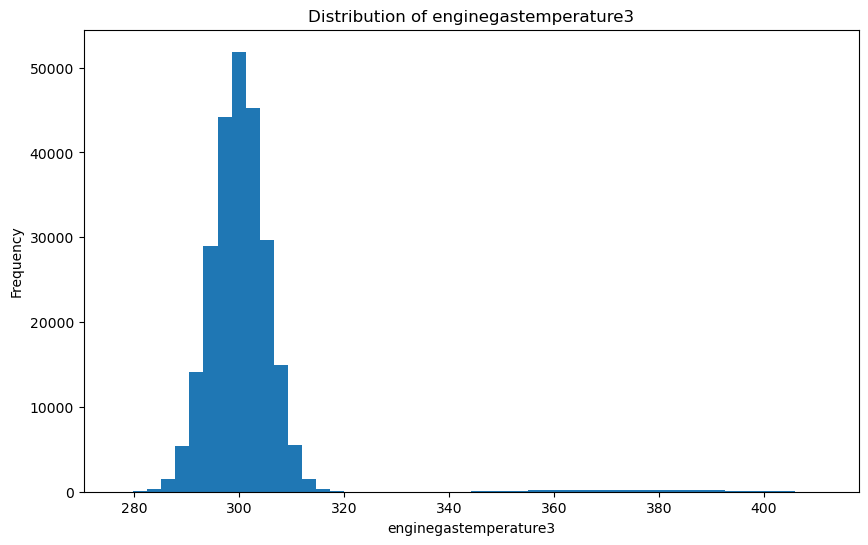

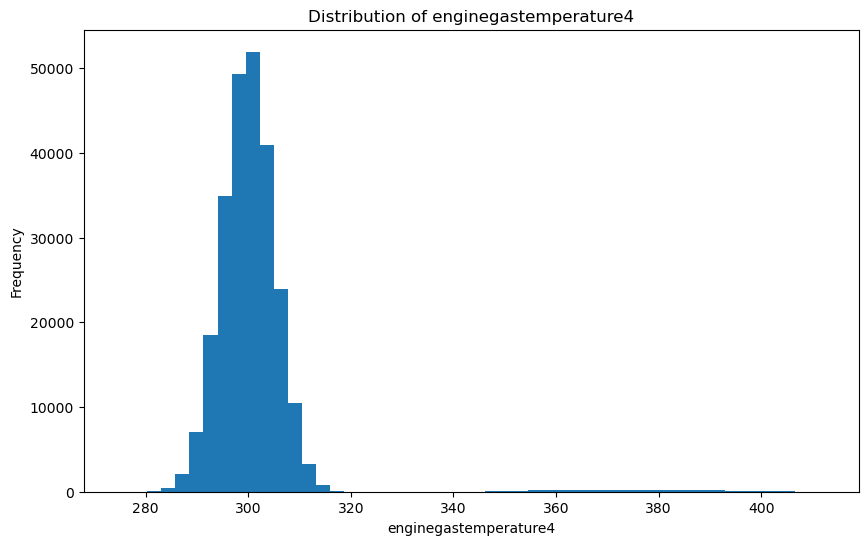

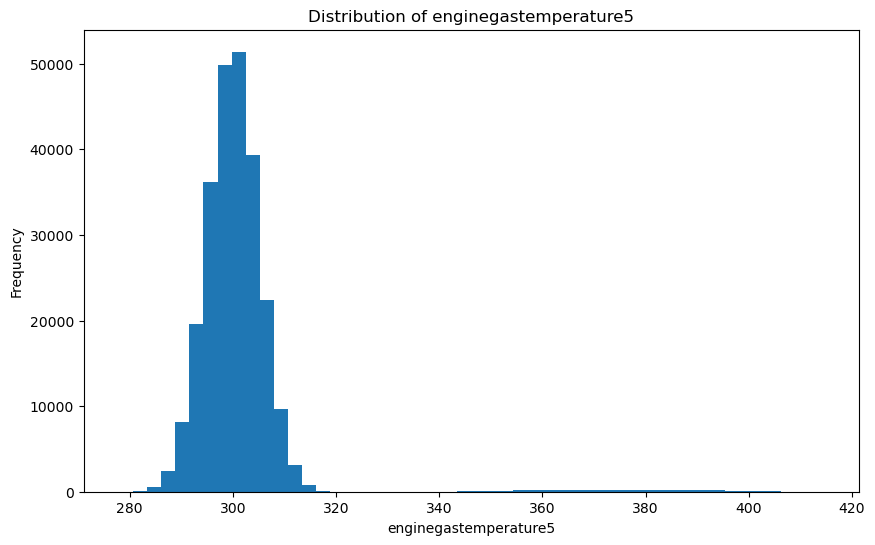

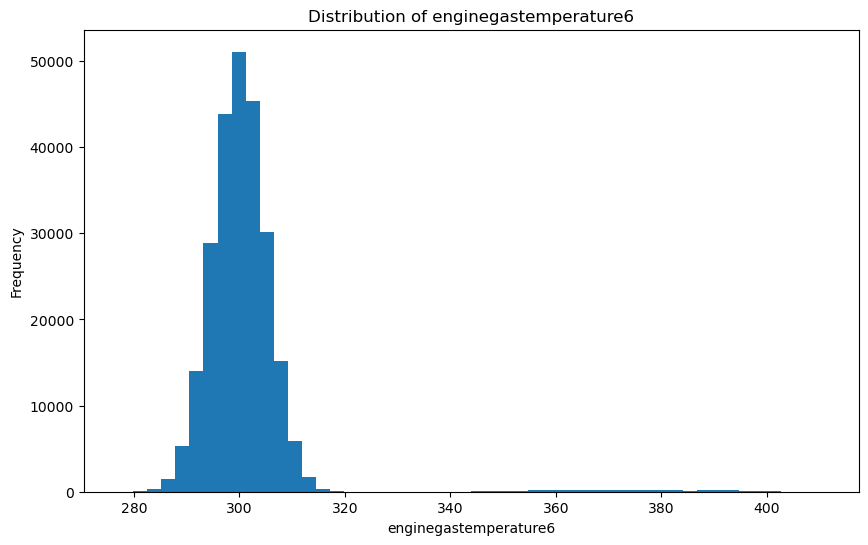

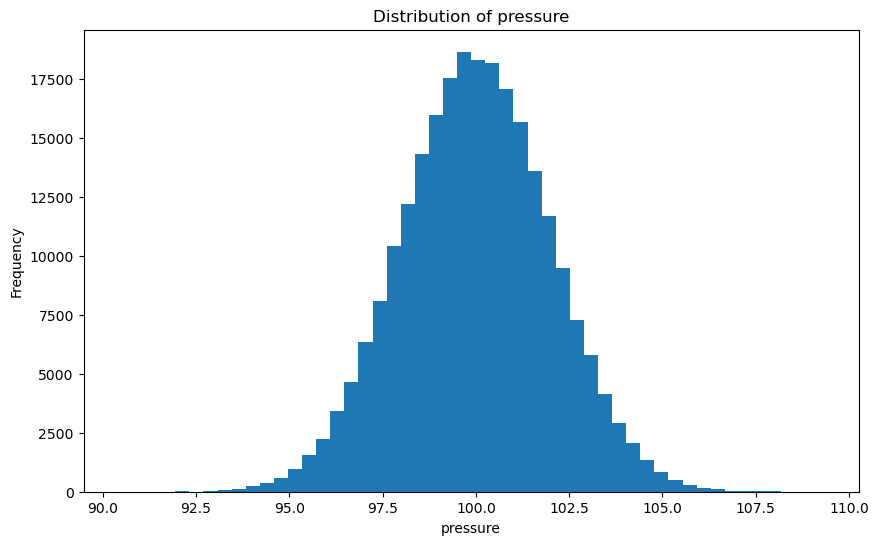

In [47]:
sensor_columns = [f'enginegastemperature{i}' for i in range(1, 7)] + ['pressure']

for col in sensor_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[col], bins=50)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
sns.histplot(df['your_column'], kde=True)
plt.title("Histogram + KDE")
plt.show()

### Histogram + KDE (Kernel Density Estimate)

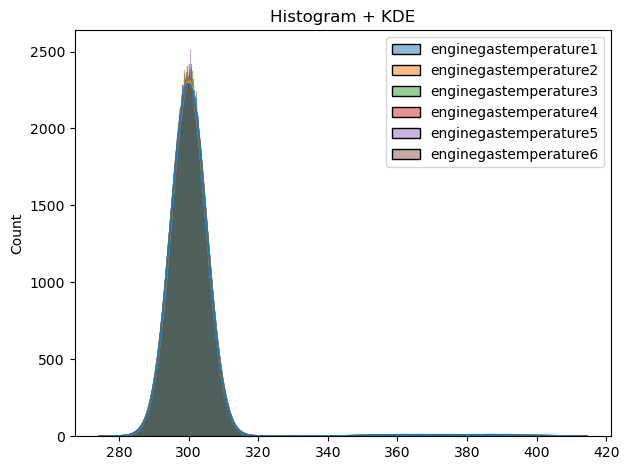

In [48]:
sns.histplot(df[columns_plot], kde=True)
plt.title("Histogram + KDE")
plt.tight_layout()
plt.show()

### Q-Q Plot

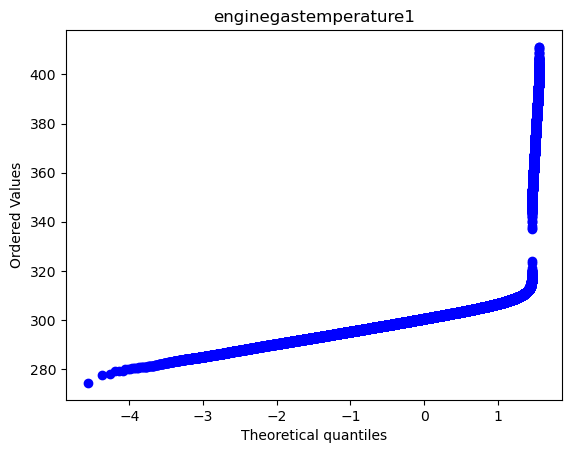

In [49]:
stats.probplot(df['enginegastemperature1'], dist="norm", plot=plt)
plt.title('enginegastemperature1')
plt.show()

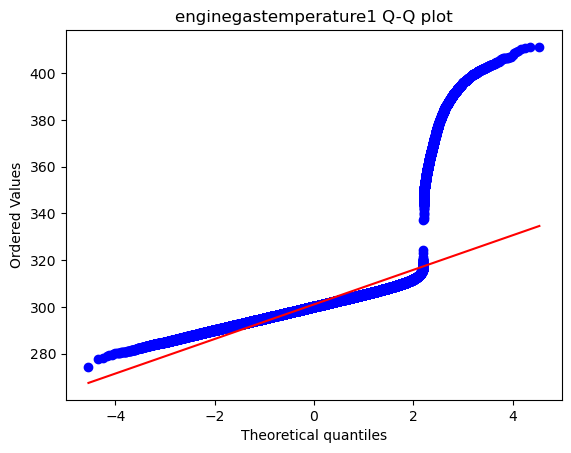

In [51]:
stats.probplot(df['enginegastemperature1'].dropna(), dist="norm", plot=plt)
plt.title('enginegastemperature1 Q-Q plot')
plt.show()

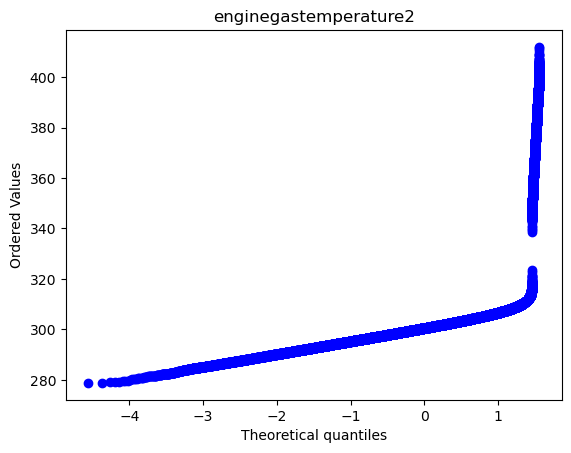

In [50]:
stats.probplot(df['enginegastemperature2'], dist="norm", plot=plt)
plt.title('enginegastemperature2')
plt.show()

### Boxplot (matplotlib)

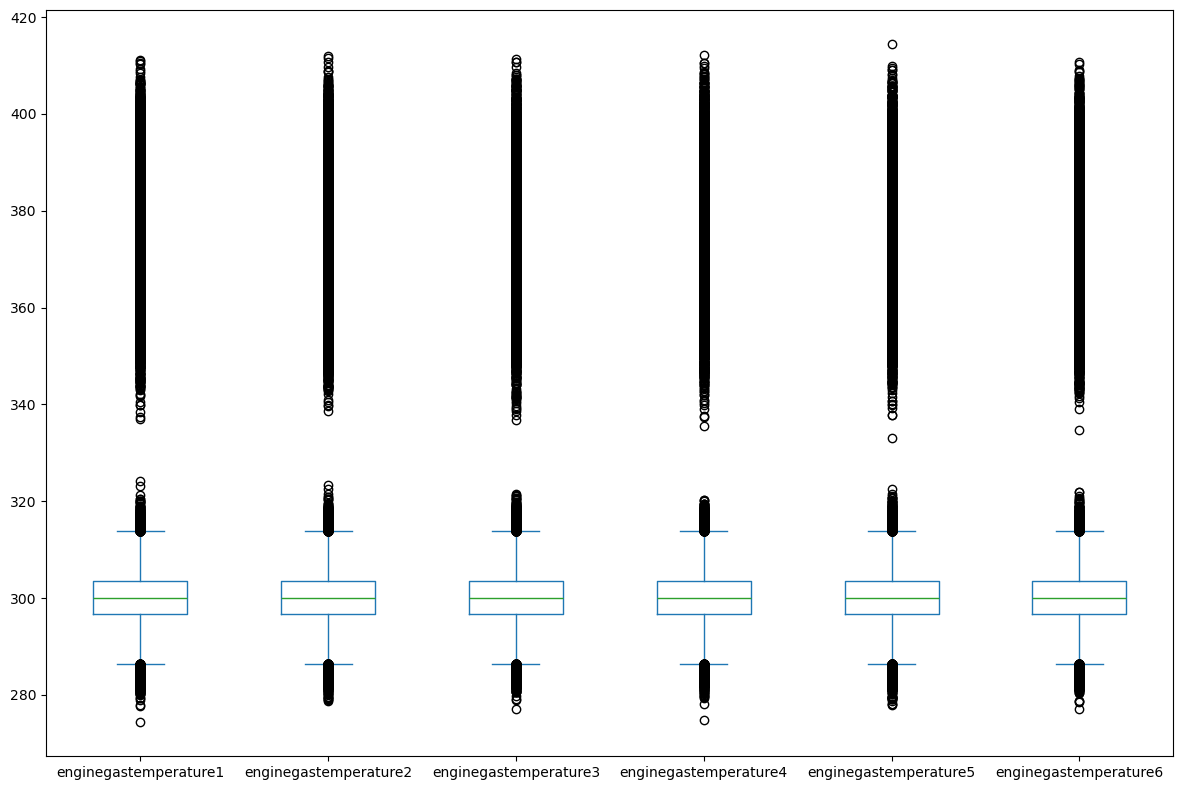

In [67]:
matplotlibBoxplot(df=df,columns=columns_plot)

### Box plot (seaborn)

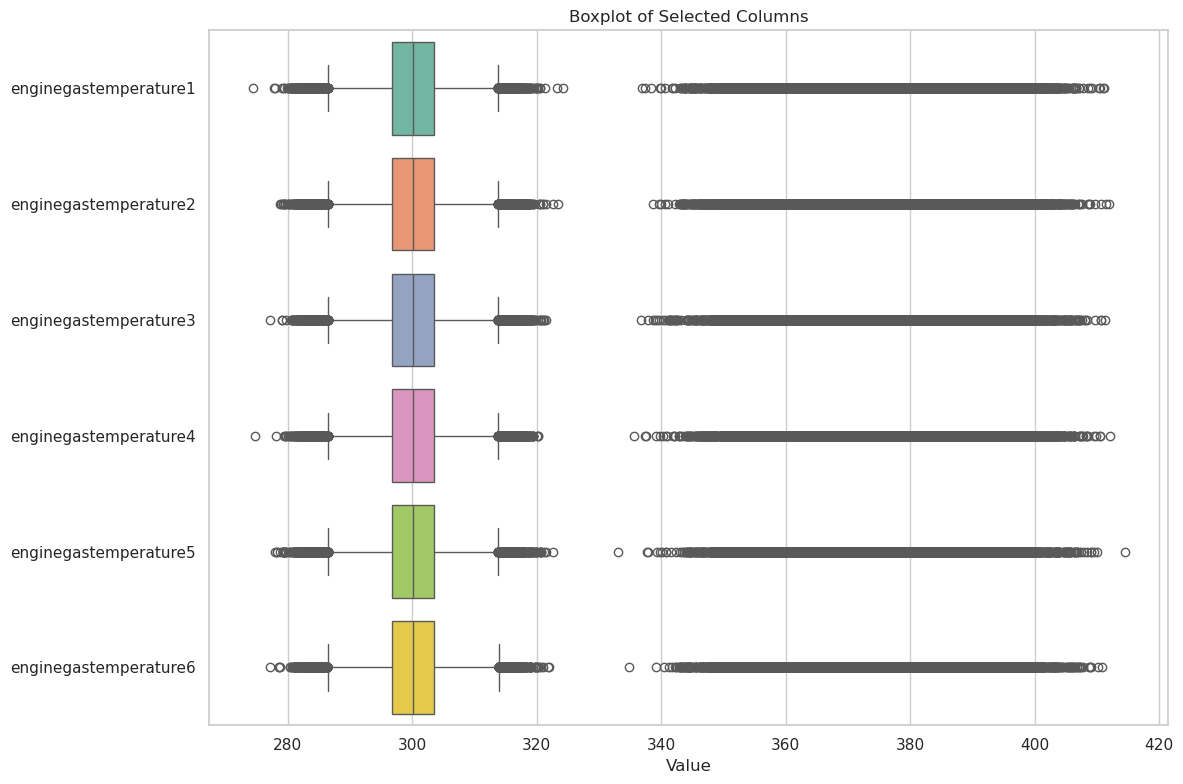

In [74]:
seabornBoxplot(df=df,columns=columns_plot)

<Axes: xlabel='enginegastemperature1'>

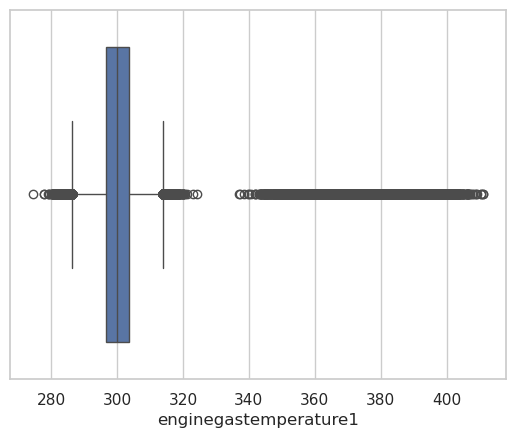

In [26]:
sns.set_theme(style="whitegrid")
sns.boxplot(data=df, x="enginegastemperature1" ) # hue='machineid'

<Axes: ylabel='pressure'>

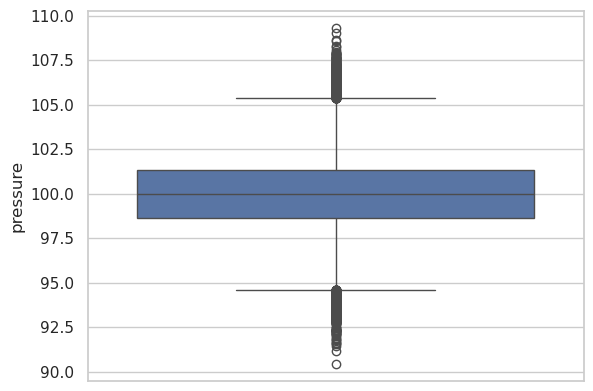

In [28]:
sns.set_theme(style="whitegrid")
sns.boxplot(data=df, y="pressure" ) # hue='machineid'

In [ ]:
sns.set_theme(style="whitegrid")
sns.boxplot(data=df, y="pressure" ) #

### Is is normal 


📊 Analyzing: machineid


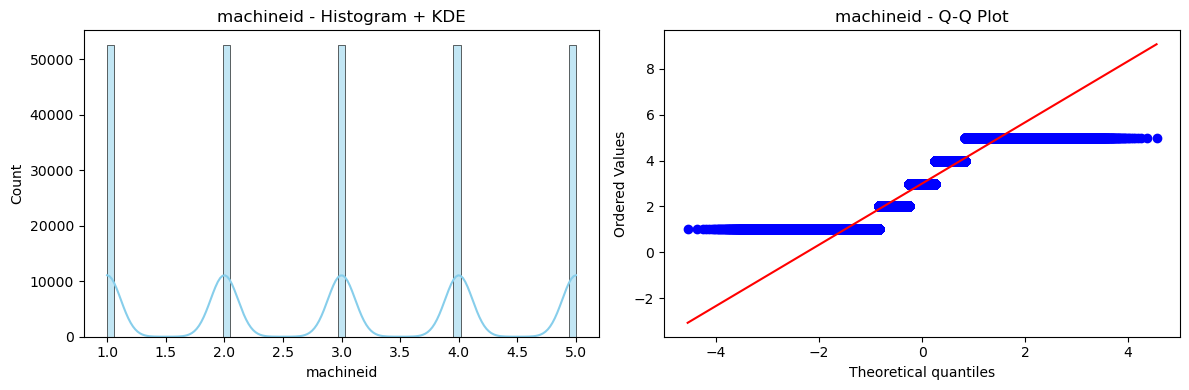


📊 Analyzing: enginegastemperature1


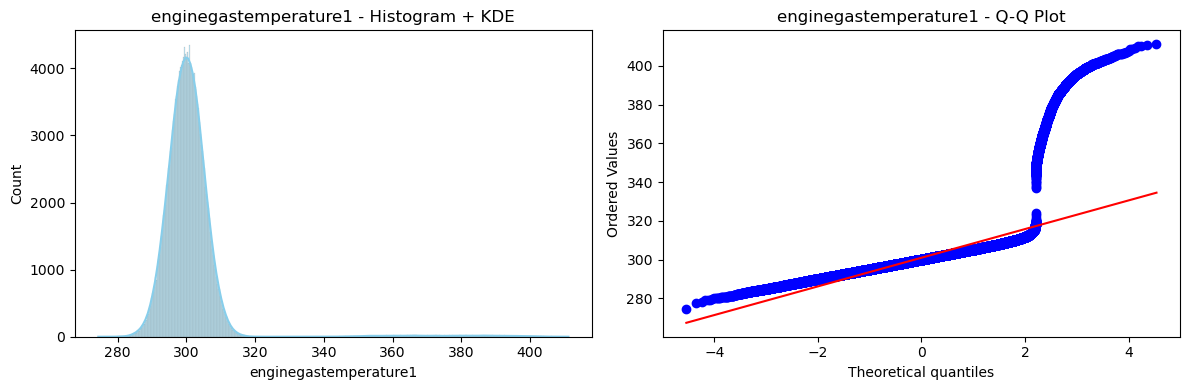


📊 Analyzing: enginegastemperature2


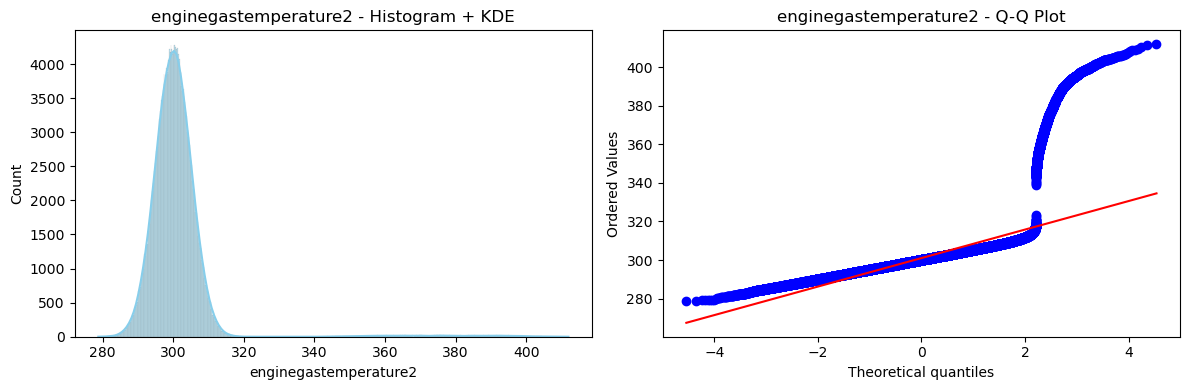


📊 Analyzing: enginegastemperature3


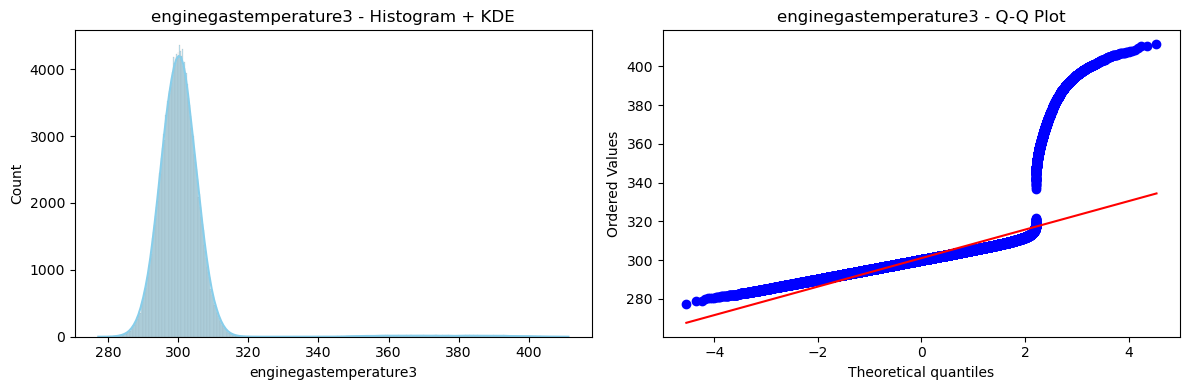


📊 Analyzing: enginegastemperature4


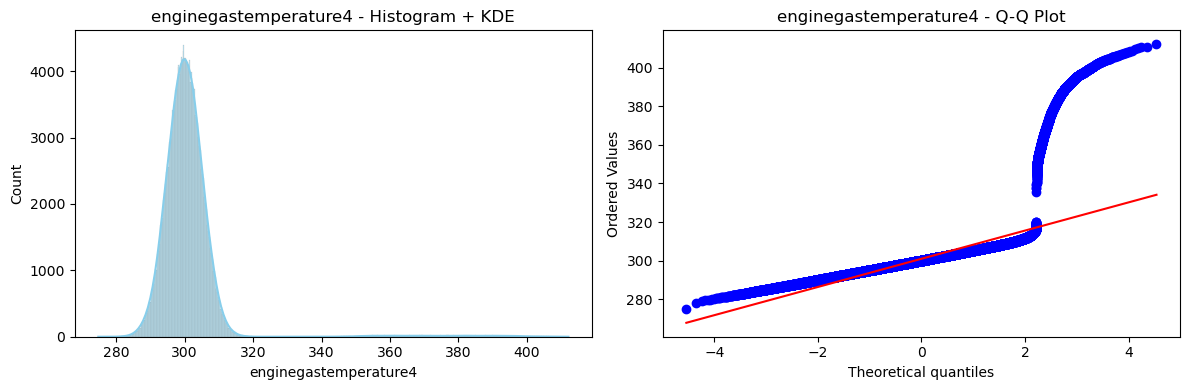


📊 Analyzing: enginegastemperature5


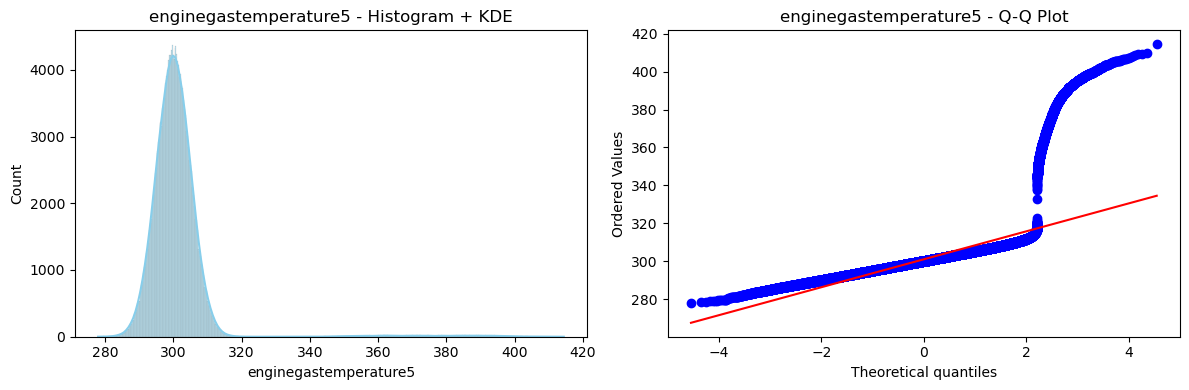


📊 Analyzing: enginegastemperature6


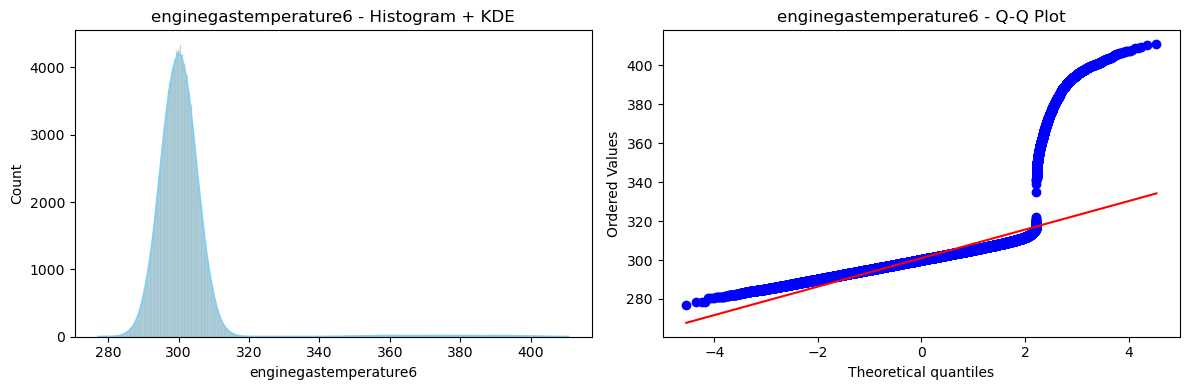


📊 Analyzing: pressure


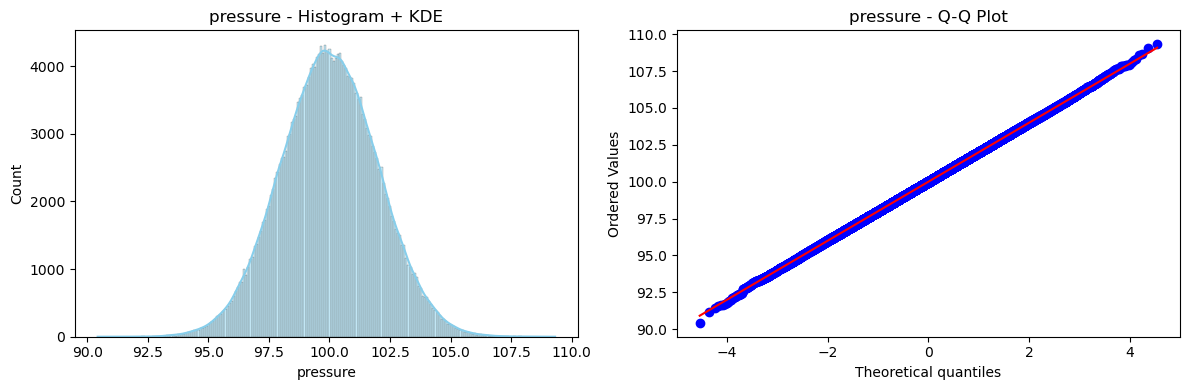

,Column,Non-Null Count,Shapiro p-value,D’Agostino p-value,Likely Normal?
0,machineid,262800,0.0000,0.0000,❌ No
1,enginegastemperature1,247227,0.0000,0.0000,❌ No
2,enginegastemperature2,247090,0.0000,0.0000,❌ No
3,enginegastemperature3,247028,0.0000,0.0000,❌ No
4,enginegastemperature4,247054,0.0000,0.0000,❌ No
5,enginegastemperature5,247144,0.0000,0.0000,❌ No
6,enginegastemperature6,247013,0.0000,0.0000,❌ No
7,pressure,247183,0.3755,0.9754,✅ Yes


In [60]:
check_dataframe_normality(df, alpha=0.05)

In [61]:

stat, p = shapiro(df['enginegastemperature1'].dropna())
print(f"Shapiro-Wilk p-value: {p}")

if p > 0.05:
    print("✅ Likely normal")
else:
    print("❌ Not normal")

Shapiro-Wilk p-value: 1.0367354278953366e-181
❌ Not normal


/programs/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 247227.
  res = hypotest_fun_out(*samples, **kwds)


In [62]:
stat, p = normaltest(df['enginegastemperature1'].dropna())
print(f"D’Agostino p-value: {p}")

if p > 0.05:
    print("✅ Likely normal")
else:
    print("❌ Not normal")

D’Agostino p-value: 0.0
❌ Not normal


## Correlation

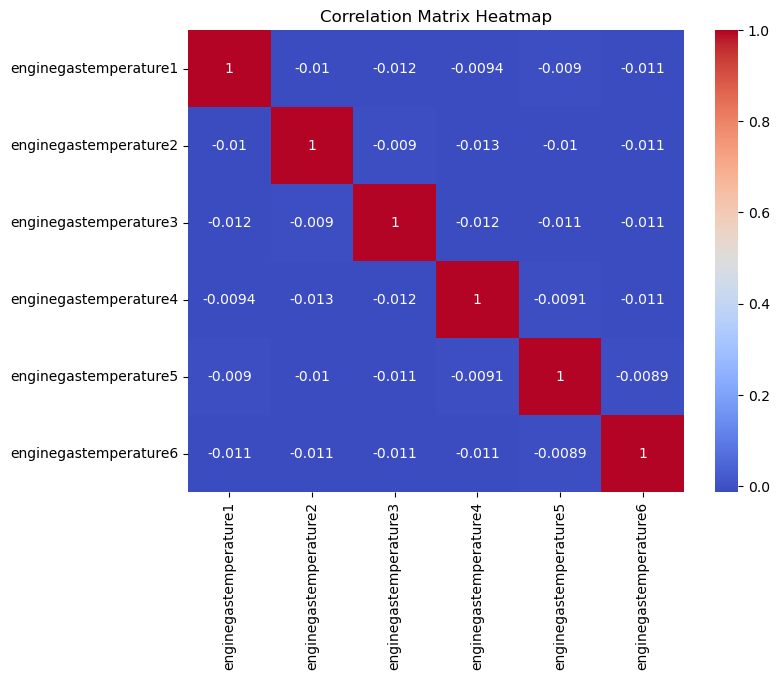

In [43]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[columns_plot].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

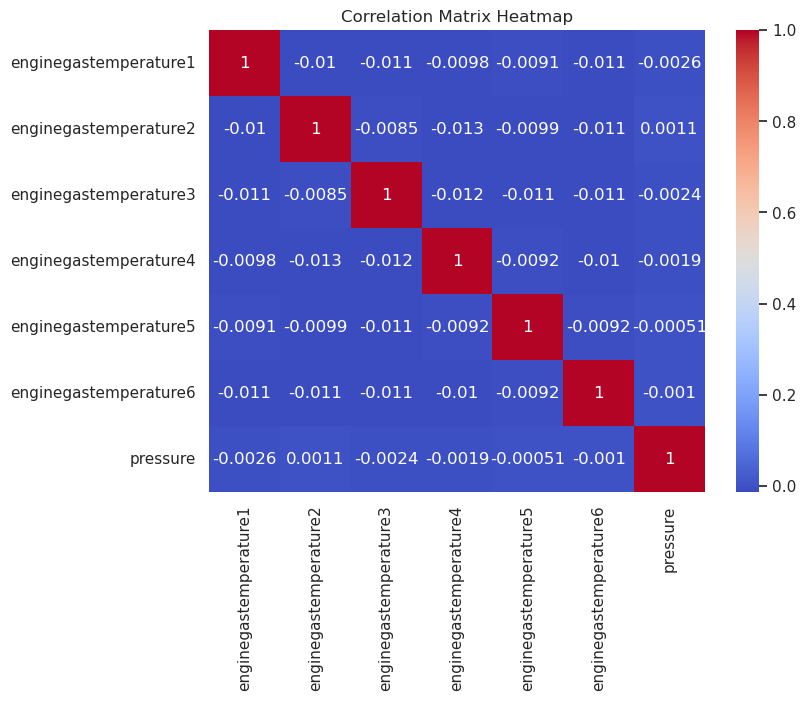

In [30]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

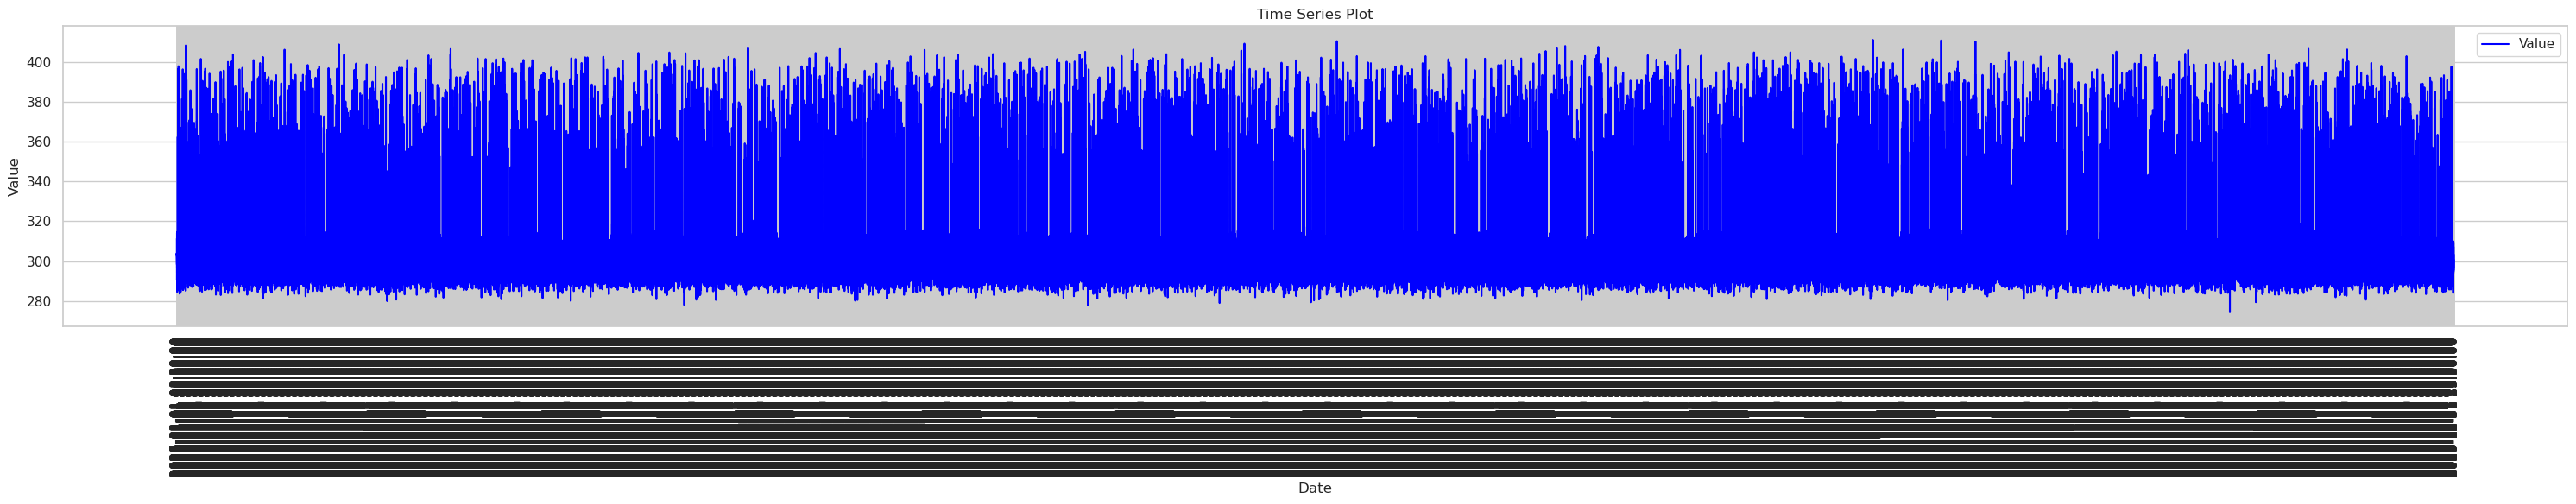

In [35]:
plt.figure(figsize=(30, 6))
plt.plot(df.index, df['enginegastemperature1'], label='Value', color='blue')
plt.xticks(rotation=90)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<Axes: xlabel='datetimestamp'>

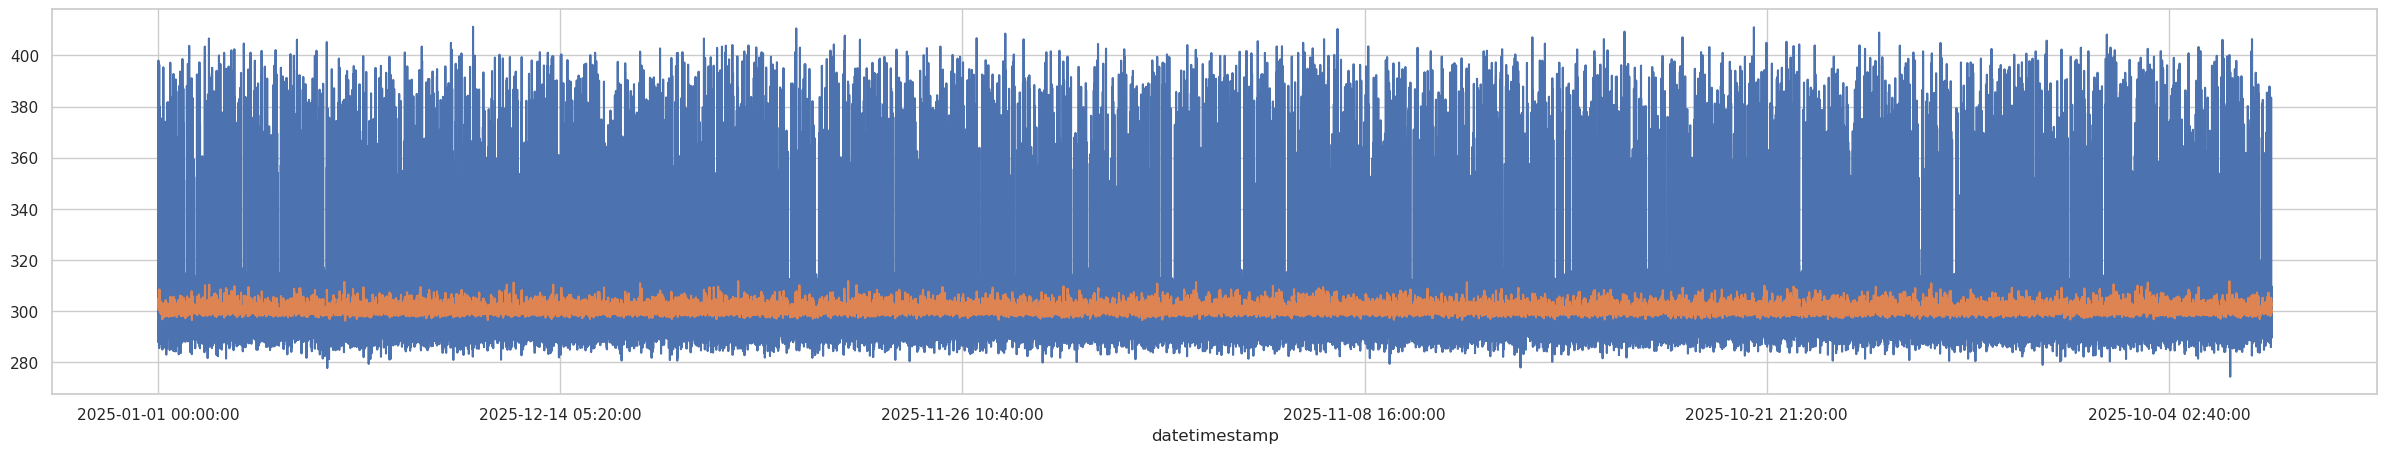

In [33]:
df['enginegastemperature1'].plot(figsize=(30,5))
plt.xticks(rotation=90)
df.rolling(window=30).mean()['enginegastemperature1'].plot()
